In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
db_df = pd.read_csv(r'..\databases\common_Ilab_atomtrace_database_extended.csv')
max_ilab_int = db_df["IntIlab"].max()
db_df["IntLevel Ilab"] = np.where(db_df["IntIlab"] >= max_ilab_int/1.2, 3, np.where(db_df["IntIlab"] >=max_ilab_int/4, 2, np.where(db_df["IntIlab"].isna() == True, np.NaN, 1)))
max_atomtrace_int = np.log1p(db_df["IntAtomtrace"]).max()
db_df["IntLevel Atomtrace"] = np.where(np.log1p(db_df["IntAtomtrace"])>=max_atomtrace_int/1.2, 3, np.where(np.log1p(db_df["IntAtomtrace"])>=max_atomtrace_int/4, 2, np.where(db_df["IntAtomtrace"].isna() == True, np.NaN, 1)))
db_df["IntLevel"] = np.where(db_df["IntLevel Ilab"].isna() == False, db_df["IntLevel Ilab"], db_df["IntLevel Atomtrace"])
db_df.drop(["IntLevel Ilab", "IntLevel Atomtrace"], axis=1, inplace=True)
db_df

,Unnamed: 0,ElemSymbol,AtNum,Charge,Wavelength,IntIlab,Aki,Ei,Ek,gi,gk,IntAtomtrace,Source,IntLevel
0,0,Xe,54,2,103.77,179.0,NaN,NaN,NaN,NaN,NaN,NaN,Ilab,1.0
1,1,Xe,54,2,104.13,230.0,NaN,NaN,NaN,NaN,NaN,NaN,Ilab,1.0
2,2,Ar,18,1,104.82,691.0,NaN,NaN,NaN,NaN,NaN,NaN,Ilab,2.0
3,3,Xe,54,2,104.83,208.0,NaN,NaN,NaN,NaN,NaN,NaN,Ilab,1.0
4,4,Xe,54,2,105.19,230.0,NaN,NaN,NaN,NaN,NaN,NaN,Ilab,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2459,Th,90,2,438.19,NaN,11530000.0,0.831,3.659,10.0,10.0,1.651102e+06,atomtrace,2.0
2460,2460,Th,90,2,439.11,NaN,6470000.0,0.557,3.379,6.0,8.0,1.025776e+06,atomtrace,2.0
2461,2461,U,92,2,367.01,NaN,27709000.0,0.113,3.481,10.0,12.0,5.854027e+06,atomtrace,3.0
2462,2462,U,92,2,409.01,NaN,12000000.0,0.217,3.248,14.0,14.0,3.876045e+06,atomtrace,3.0


<Axes: xlabel='Wavelength', ylabel='IntLevel'>

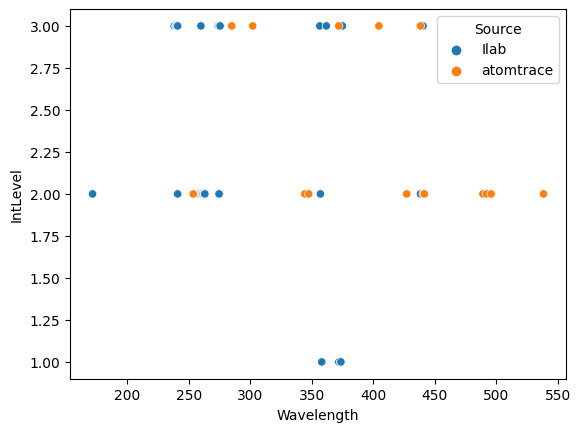

In [46]:
elem = "Fe"
sns.scatterplot(x=db_df[db_df["ElemSymbol"] == elem]["Wavelength"], y=db_df[db_df["ElemSymbol"] == elem]["IntLevel"], hue=db_df[db_df["ElemSymbol"] == elem]["Source"])

(array([12.,  7.,  4.,  5.,  4., 11., 34., 49., 88., 48.]),
 array([ 0.        ,  1.78168867,  3.56337734,  5.34506601,  7.12675468,
         8.90844335, 10.69013202, 12.47182069, 14.25350936, 16.03519803,
        17.81688671]),
 <BarContainer object of 10 artists>)

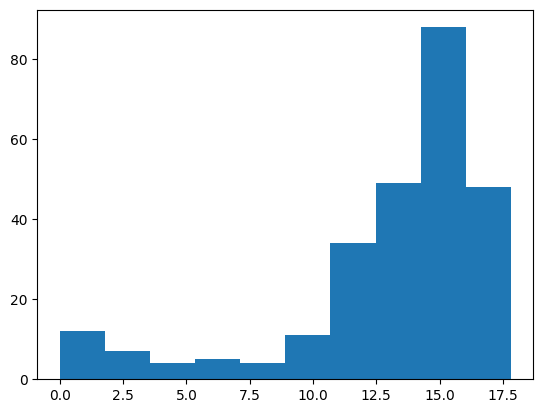

In [48]:
plt.hist(np.log1p(db_df["IntAtomtrace"]))

(array([105.,  81., 180., 289., 708., 579., 135.,  50.,  46.,  12.]),
 array([-100. ,   71.2,  242.4,  413.6,  584.8,  756. ,  927.2, 1098.4,
        1269.6, 1440.8, 1612. ]),
 <BarContainer object of 10 artists>)

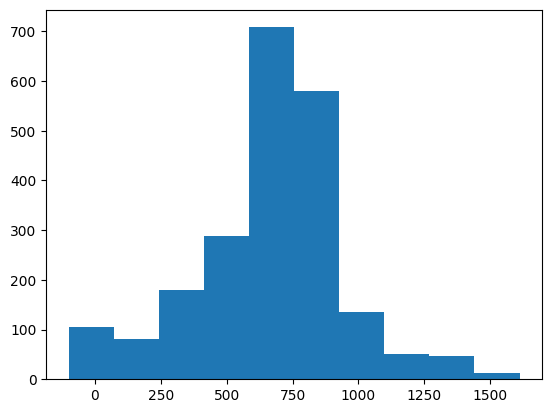

In [49]:
plt.hist(db_df["IntIlab"])